In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
color_dict = {
    "Eggshell": "#f4f1de",
    "Burnt sienna": "#e07a5f",
    "Delft Blue": "#3d405b",
    "Cambridge blue": "#81b29a",
    "Sunset": "#f2cc8f",
    "Rose taupe": "#8F5D5D"
}
# Use LaTeX fonts for a professional look
plt.rcParams.update(
    {
        "text.usetex": True,  # Use LaTeX for text rendering
        "font.family": "serif",  # Use serif fonts
    }
)

# Set seaborn style for better aesthetics
# sns.set_style("whitegrid")

## Comparison with Sakana over JA

In [32]:
name_mapping = {
    'Mistral-7B-v0.1.csv': 'Mistral-7B',
    'shisa-gamma-7b-v1.csv': 'ShiSA-Gamma-7B',
    'Arithmo2-Mistral-7B.csv': 'Arithmo2-7B',
    'phenotype_0_rc20.csv': 'MERG$E^3_{20}$',
    'phenotype_1_rc30.csv': 'MERG$E^3_{30}$',
    'phenotype_2_rc50.csv': 'MERG$E^3_{50}$',
    'phenotype_3_rc100.csv': 'MERG$E^3_{100}$',
    'Abel-7B-002.csv': 'Abel-7B',
    'EvoLLM-JP-v1-7B.csv': 'EvoLLM-JP-7B',
}

In [33]:
# ----------------------------------------------------------------------
# Read data for each language
# ------------------------------------------------------------------------
# Example file names; adjust as needed
df = pd.read_csv("data/sakana_comparison.csv")    # 'bin', 'accuracy'

# Tag each DataFrame with the appropriate language
df["language"] = "Japanese"

In [34]:
# rename 
df['bin'] = df['bin'].map(name_mapping)

df.dropna(inplace=True)


In [35]:
df

,bin,accuracy,dataset_size,language
0,Mistral-7B,0.000,0,Japanese
1,ShiSA-Gamma-7B,0.020,0,Japanese
2,Arithmo2-7B,0.036,0,Japanese
3,Abel-7B,0.244,0,Japanese
4,MERG$E^3_{20}$,0.344,20,Japanese
5,MERG$E^3_{30}$,0.380,30,Japanese
6,MERG$E^3_{50}$,0.380,50,Japanese
7,MERG$E^3_{100}$,0.420,100,Japanese
8,EvoLLM-JP-7B,0.488,1069,Japanese


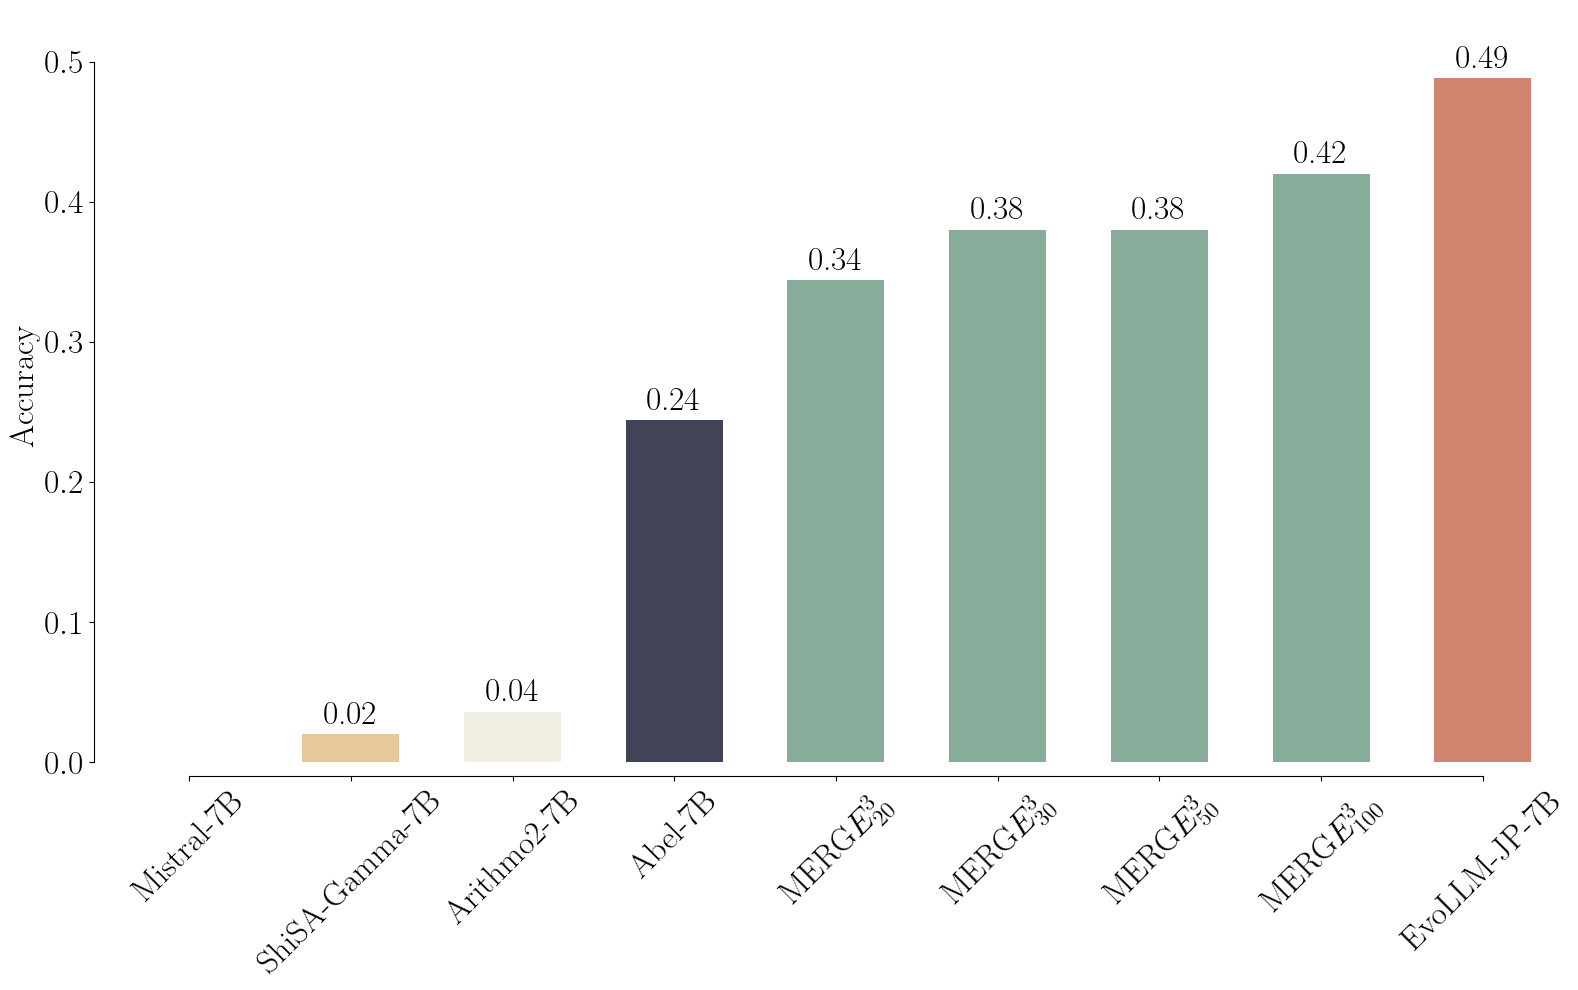

In [37]:

colors = {
     'MERG$E^3_{20}$': color_dict["Cambridge blue"],
        'MERG$E^3_{30}$': color_dict["Cambridge blue"],
        'MERG$E^3_{50}$': color_dict["Cambridge blue"],
        'MERG$E^3_{100}$': color_dict["Cambridge blue"],
        'Abel-7B': color_dict["Delft Blue"],
        'EvoLLM-JP-7B': color_dict["Burnt sienna"],
        'Arithmo2-7B': color_dict['Eggshell'],
        'ShiSA-Gamma-7B': color_dict["Sunset"],
        'Mistral-7B': color_dict["Rose taupe"]
}

fig, ax = plt.subplots(figsize=(16, 10))

sns.barplot(
    data=df,
    y="accuracy",
    x="bin",
    hue="bin",
    palette=colors,
    width=0.6,  # narrower bars
    ax=ax
)

# Give some extra headroom for the labels
max_val = df['accuracy'].max()
ax.set_ylim(top=max_val * 1.1)

# Put numeric labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.2f}",
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3),     # offset label slightly above the bar
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=24        # <-- Larger font for bar labels
        )

ax.tick_params(axis='x', labelrotation=45)  # rotate using tick_params

# Make tick-label fonts larger
ax.tick_params(axis='both', labelsize=24)  # <-- Larger tick labels

# Increase label/title font sizes
plt.xlabel("", fontsize=24)   # <-- Larger x-axis label
plt.ylabel("Accuracy", fontsize=24)  # <-- Larger y-axis label

# Optional: remove the top/right spines
sns.despine(offset=10, trim=True)

plt.tight_layout()

plt.savefig(f"figures/comparison-Sakana.pdf", bbox_inches='tight')
plt.show()
